<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/Homework-3/HW_3_Resubmit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HP-1

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
#Let's load the data and do some preprocessing

test_data = pd.read_csv('ZipDigits.test', header=None, delim_whitespace=True)
train_data = pd.read_csv('ZipDigits.train', header=None, delim_whitespace=True)

train_data_binary = train_data[train_data[0].isin([1, 5])]
train_data[0] = train_data[0].apply(lambda x: 1 if x == 1 else -1)

test_data_binary = test_data[test_data[0].isin([1, 5])]
test_data[0] = test_data[0].apply(lambda x: 1 if x == 1 else -1)

In [64]:
#extracting and normalizing
X_train = train_data_binary.iloc[:, 1:].values
Y_train = train_data_binary.iloc[:, 0].values
X_test = test_data_binary.iloc[:, 1:].values
Y_test = test_data_binary.iloc[:, 0].values

X_train = X_train / 255.0
X_test = X_test / 255.0

In [65]:
#shuffling the data
shuffle_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffle_indices]
Y_train = Y_train[shuffle_indices]

In [66]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size)
    W2 = np.random.randn(output_size, hidden_size)
    return W1, W2

In [67]:
def forward_propagation(W, x):
    a1 = np.dot(W[0], x)
    z1 = tanh(a1)
    a2 = np.dot(W[1], z1)
    y_pred = tanh(a2)
    return a1, z1, a2, y_pred

def compute_loss(y_pred, y):
    return 0.5 * np.sum((y_pred - y)**2)

def backward_propagation(W, x, a1, z1, a2, y_pred, y):

    delta2 = (y_pred - y) * tanh_derivative(a2)
    grad_W2 = np.outer(delta2, z1)
    delta1 = np.dot(W[1].T, delta2) * tanh_derivative(a1)
    grad_W1 = np.outer(delta1, x)
    grad_W1 = np.clip(grad_W1, -1, 1)
    grad_W2 = np.clip(grad_W2, -1, 1)
    return grad_W1, grad_W2

def update_weights(W, grad_W, learning_rate):
    return W - learning_rate * grad_W



In [68]:
def train_neural_network(W, X, Y, learning_rate=0.001, max_iterations=2 * 10**6):
    iterations = 0
    losses = []
    while iterations < max_iterations:
        #random selection of example
        random_index = np.random.randint(len(X))
        x = X[random_index]
        y = Y[random_index]
        # Forward prop
        a1, z1, a2, y_pred = forward_propagation(W, x)
        #loss function
        loss = compute_loss(y_pred, y)
        # Backward prop
        grad_W1, grad_W2 = backward_propagation(W, x, a1, z1, a2, y_pred, y)
        W[0] = update_weights(W[0], grad_W1, learning_rate)
        W[1] = update_weights(W[1], grad_W2, learning_rate)

        iterations += 1
        if iterations % 100000 == 0:
          losses.append((iterations, loss))
          print(f"Iteration {iterations}, Loss: {loss}")

    return W,losses

In [69]:
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1

def initialize_weights(input_size, hidden_size, output_size):
    # Initialize weights with smaller values
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    return [W1, W2]

W_initial = initialize_weights(input_size, hidden_size, output_size)
# Train the neural network using stochastic gradient descent
W_trained,losses = train_neural_network(W_initial, X_train, Y_train)


Iteration 100000, Loss: 8.19475334538462
Iteration 200000, Loss: 9.531970921917223e-06
Iteration 300000, Loss: 8.010221241272555
Iteration 400000, Loss: 3.785586473326966e-07
Iteration 500000, Loss: 1.3900609058734197e-07
Iteration 600000, Loss: 8.012053817320663
Iteration 700000, Loss: 8.004114076255302
Iteration 800000, Loss: 8.00046374840417
Iteration 900000, Loss: 1.7001014918051233e-08
Iteration 1000000, Loss: 1.06829306612898e-08
Iteration 1100000, Loss: 1.8571581988204337e-08
Iteration 1200000, Loss: 8.000270409313568
Iteration 1300000, Loss: 9.619484009326722e-09
Iteration 1400000, Loss: 3.41403446363914e-09
Iteration 1500000, Loss: 8.00029463710808
Iteration 1600000, Loss: 1.8144871175496763e-08
Iteration 1700000, Loss: 4.886815924995003e-09
Iteration 1800000, Loss: 8.000149552383522
Iteration 1900000, Loss: 1.369033604654015e-09
Iteration 2000000, Loss: 8.000119018526656


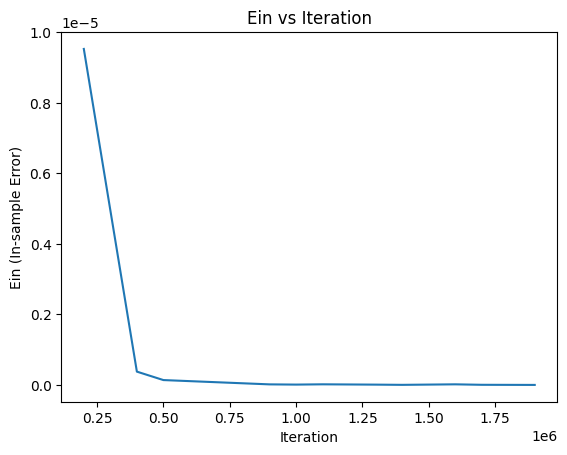

In [71]:
filtered_losses = [(iteration, loss) for iteration, loss in losses if loss <= 1]
filtered_iterations, filtered_loss_values = zip(*filtered_losses)
# Plotting versus iteration
plt.plot(filtered_iterations, filtered_loss_values)
plt.xlabel('Iteration')
plt.ylabel('Ein (In-sample Error)')
plt.title('Ein vs Iteration')
plt.show()

In [76]:
test_predictions = [np.sign(forward_propagation(W_trained, x)[-1]) for x in X_test]
test_error = np.mean(test_predictions != Y_test)
print(f"Test Error: {test_error}")

Test Error: 0.37735849056603776
